In [19]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from hmmlearn import hmm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv("glass.data", header=None)
data.columns = ['Idnumber','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','ClassIdentifier']
data

,Idnumber,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ClassIdentifier
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [21]:
data = data.values

In [22]:
data

array([[  1.     ,   1.52101,  13.64   , ...,   0.     ,   0.     ,
          1.     ],
       [  2.     ,   1.51761,  13.89   , ...,   0.     ,   0.     ,
          1.     ],
       [  3.     ,   1.51618,  13.53   , ...,   0.     ,   0.     ,
          1.     ],
       ...,
       [212.     ,   1.52065,  14.36   , ...,   1.64   ,   0.     ,
          7.     ],
       [213.     ,   1.51651,  14.38   , ...,   1.57   ,   0.     ,
          7.     ],
       [214.     ,   1.51711,  14.23   , ...,   1.67   ,   0.     ,
          7.     ]])

In [23]:
X = data[:,1:9]
Y = data[:,10]
len(Y)

214

In [24]:
from sklearn import preprocessing
X=preprocessing.scale(X)

In [25]:
X = X.astype('int64')
Y = Y.astype('int64')

In [26]:
kf = KFold(n_splits=5, shuffle=True)

In [27]:
from sklearn.metrics import accuracy_score
train_scores = []
test_scores = []
fold_index = 1
for train, test in kf.split(X, Y):
    clf = hmm.GaussianHMM(n_components = 6, covariance_type = "diag", n_iter = 1000, random_state = 42)
    clf.fit(X[train])
    y_states = clf.predict(X[test])
    print(accuracy_score(Y[test],y_states))

0.32558139534883723
0.37209302325581395
0.23255813953488372
0.0
0.0


In [28]:
y_states

array([5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 4, 0, 0, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 3, 0, 4, 5, 5, 5])

In [29]:
y_pred = clf.predict(X)

In [30]:
y_pred

array([5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 3, 1, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 4, 3, 3, 3, 3, 2, 2, 3, 0, 3,
       0, 0, 0, 0, 4, 3, 3, 3, 4, 5, 5, 0, 4, 5, 5, 4, 4, 5, 5, 4, 5, 4,
       4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5])

In [31]:
y_true = Y
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [68,  0,  0,  0,  0,  2,  0,  0],
       [61,  1,  0,  9,  5,  0,  0,  0],
       [17,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  6,  2,  1,  0,  0],
       [ 4,  0,  0,  3,  2,  0,  0,  0],
       [ 1,  0,  0,  0, 12, 16,  0,  0]])

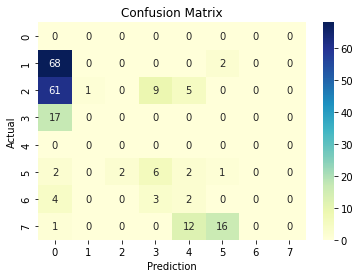

<Figure size 1584x864 with 0 Axes>

In [32]:
figure = sns.heatmap(cf_matrix, annot=True, cmap='YlGnBu')
plt.figure(figsize = (22,12))
figure.set_title('Confusion Matrix')
figure.set_xlabel('Prediction')
figure.set_ylabel('Actual')
plt.show()

In [33]:
FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix)  
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)

In [34]:
Sensitivity = TP / (TP + FN)
Specificity = TN / (TN + FP)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 = 2 * (Precision * Recall) / (Precision + Recall)
Total_Accuracy = (TP + TN) / (TP + FP + FN + TN)

In [35]:
Sensitivity

array([       nan, 0.        , 0.        , 0.        ,        nan,
       0.07692308, 0.        , 0.        ])

In [36]:
Specificity

array([0.28504673, 0.99305556, 0.98550725, 0.90862944, 0.90186916,
       0.91044776, 1.        , 1.        ])

In [37]:
Precision

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05263158,        nan,        nan])

In [38]:
Recall

array([       nan, 0.        , 0.        , 0.        ,        nan,
       0.07692308, 0.        , 0.        ])

In [39]:
F1

array([   nan,    nan,    nan,    nan,    nan, 0.0625,    nan,    nan])

In [40]:
Total_Accuracy

array([0.28504673, 0.6682243 , 0.63551402, 0.8364486 , 0.90186916,
       0.85981308, 0.95794393, 0.86448598])

In [41]:
pred_prob = clf.predict_proba(X)

In [45]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y, pred_prob[:,1], pos_label=1)

In [43]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y))]
p_fpr, p_tpr, _ = roc_curve(Y, random_probs, pos_label=1)

In [44]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(Y, pred_prob, multi_class="ovo",average='macro')
auc_score

0.6984931204786815